In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('/content/drive/MyDrive/kaggle/bike-sharing-demand/train.csv', sep = ',')
df_test = pd.read_csv('/content/drive/MyDrive/kaggle/bike-sharing-demand/test.csv',sep = ',')

In [57]:
df_train.shape, df_test.shape

((10886, 12), (6493, 9))

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [59]:
df_train_1 = df_train.copy()
df_test_1 = df_test.copy()
df_train['datetime'] = pd.to_datetime(df_train_1['datetime'])
df_train_1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [60]:
df_train_1.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [61]:
df_train_1['year'] = df_train_1['datetime'].dt.year
df_train_1['month'] = df_train_1['datetime'].dt.month
df_train_1['day'] = df_train_1['datetime'].dt.day
df_train_1['hour'] = df_train_1['datetime'].dt.hour
df_train_1['min'] = df_train_1['datetime'].dt.minute
df_train_1['second'] = df_train_1['datetime'].dt.second

# 요일 데이터 - 일요일은 0
df_train_1['dayofweek'] = df_train_1['datetime'].dt.dayofweek

In [62]:
df_train_1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [63]:
df_train_1.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,second,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000


[Text(0, 0.5, 'hour'), Text(0.5, 1.0, 'Hour rental amount')]

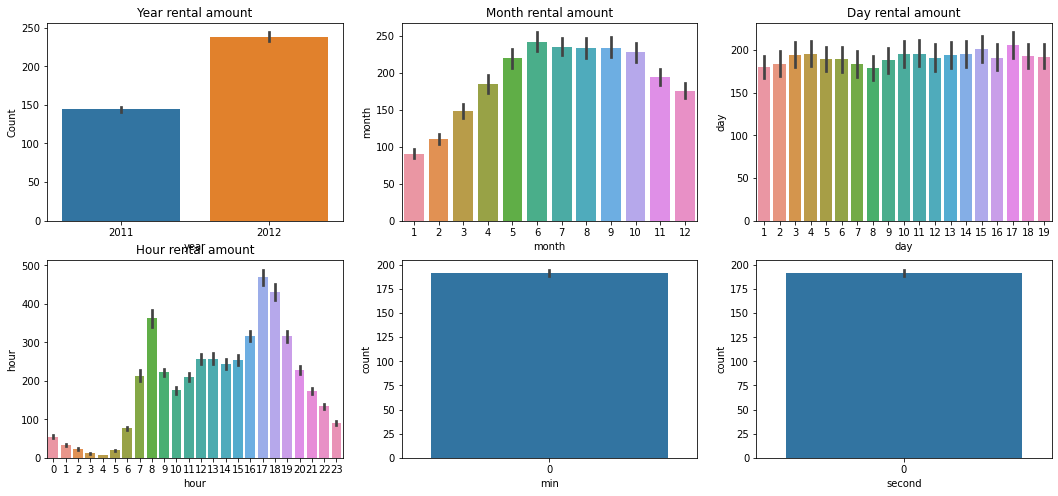

In [64]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols = 3)
figure.set_size_inches(18,8)

sns.barplot(data = df_train_1, x = 'year', y = 'count', ax = ax1)
sns.barplot(data = df_train_1, x = 'month', y = 'count', ax = ax2)
sns.barplot(data = df_train_1, x = 'day', y = 'count', ax = ax3)
sns.barplot(data = df_train_1, x = 'hour', y = 'count', ax = ax4)
sns.barplot(data = df_train_1, x = 'min', y = 'count', ax = ax5)
sns.barplot(data = df_train_1, x = 'second', y = 'count', ax = ax6)

ax1.set(ylabel = 'Count', title = 'Year rental amount')
ax2.set(ylabel = 'month', title = 'Month rental amount')
ax3.set(ylabel = 'day', title = 'Day rental amount')
ax4.set(ylabel = 'hour', title = 'Hour rental amount')

- 날짜별 데이터, 분, 초의 데이터는 변별력이 없다고 생각한다. 

- Month에 대해서는 한번 더 연구해봐야 겠고 2011년보다 2012년에 늘었다는점 그리고 출퇴근 시간인 8~ 5시에 급증하는거로 봐서 평일과 공휴일을 나눠서 비교해보는 것이 좋을 것 같다.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Working or not Rental amount')]

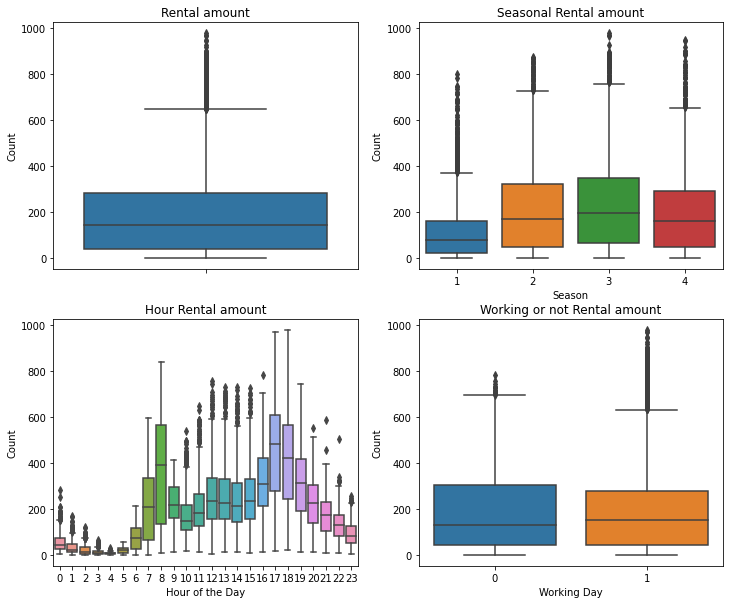

In [65]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12,10)
sns.boxplot(data = df_train_1, y = 'count',orient = 'v', ax = ax[0][0])
sns.boxplot(data = df_train_1, y = 'count',x = 'season', orient = 'v', ax = ax[0][1])
sns.boxplot(data = df_train_1, y = 'count',x = 'hour' ,orient = 'v', ax = ax[1][0])
sns.boxplot(data = df_train_1, y = 'count',x = 'workingday', orient = 'v', ax = ax[1][1])

ax[0][0].set(ylabel = 'Count', title = 'Rental amount')
ax[0][1].set(xlabel = 'Season', ylabel = 'Count', title = 'Seasonal Rental amount')
ax[1][0].set(xlabel = 'Hour of the Day', ylabel = 'Count', title = 'Hour Rental amount')
ax[1][1].set(xlabel = 'Working Day', ylabel = 'Count', title = 'Working or not Rental amount')


# 이상치가 너무 많음 ->  이상치 처리를 해줘야 겠구나!

- 위 그래프를 보면 대여량은 특정 기간에 머물러 있고 특히 근무일이 아닐 때 대여량이 더 많은 것을 알 수 있다.

In [66]:
df_train_1.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'min', 'second', 'dayofweek'],
      dtype='object')

[Text(0.5, 1.0, 'hue = season')]

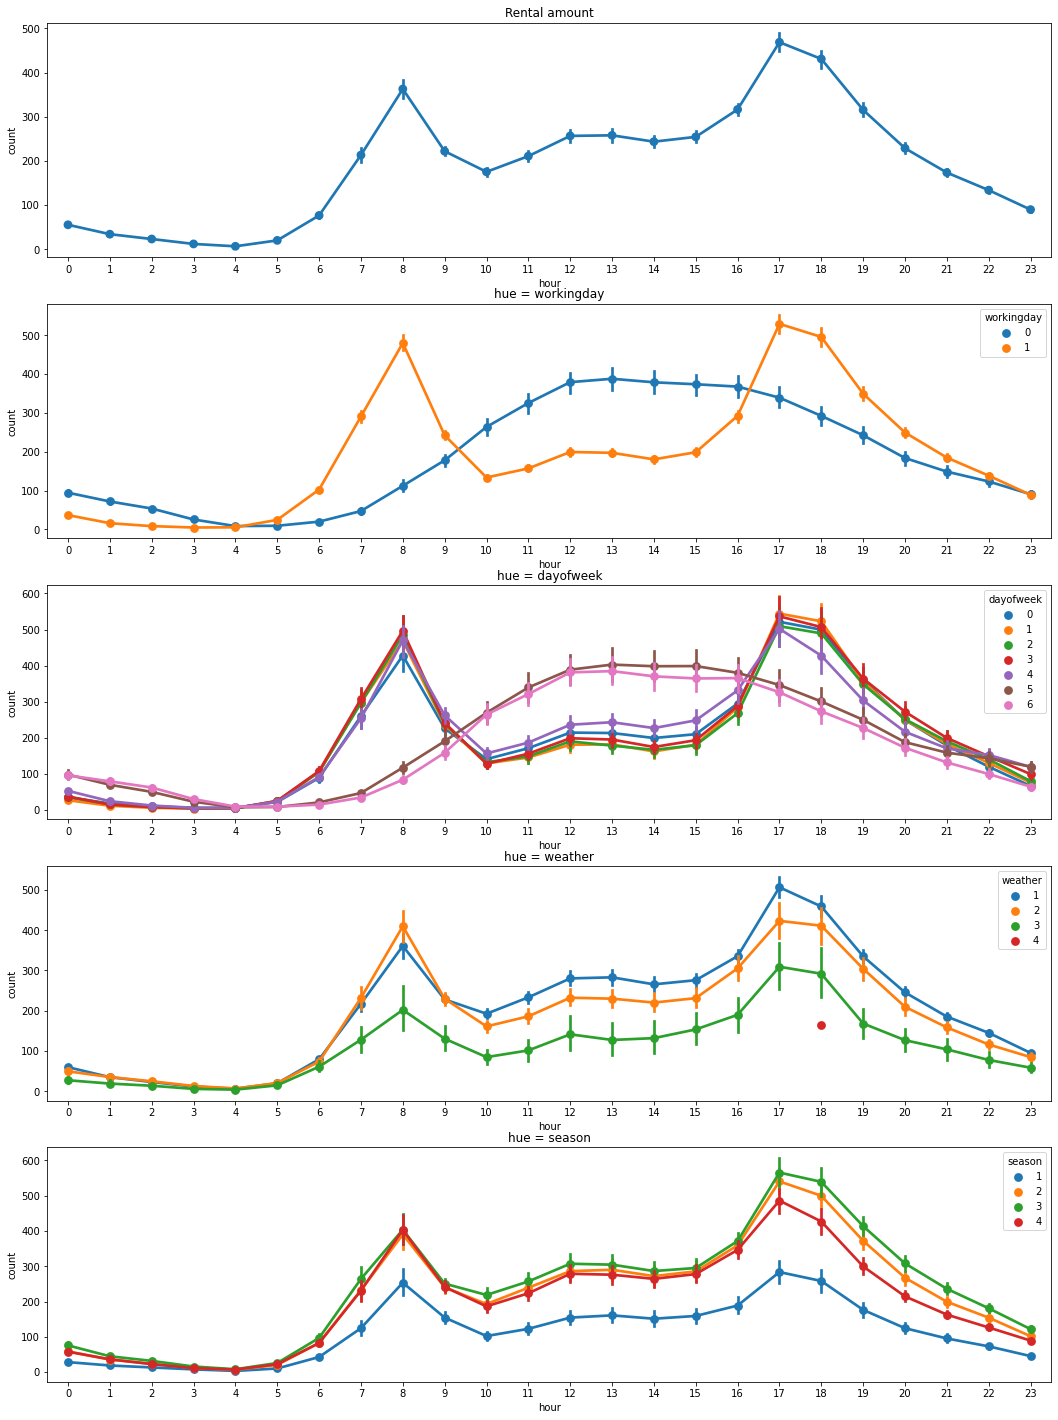

In [67]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

# 꺽은선 그래프
sns.pointplot(data = df_train_1, x = 'hour', y = 'count', ax = ax1)
sns.pointplot(data = df_train_1, x = 'hour', y = 'count', hue = 'workingday', ax = ax2)
sns.pointplot(data = df_train_1, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax3)
sns.pointplot(data = df_train_1, x = 'hour', y = 'count', hue = 'weather', ax = ax4)
sns.pointplot(data = df_train_1, x = 'hour', y = 'count', hue = 'season', ax = ax5)

ax1.set(title = 'Rental amount')
ax2.set(title = 'hue = workingday')
ax3.set(title = 'hue = dayofweek')
ax4.set(title = 'hue = weather')
ax5.set(title = 'hue = season')

In [68]:
# corrMatt = train[['temp','atemp','casual','registered','humidity','windspeed','count' ]]
# 상관 계수 측정
corrMatt = df_train_1.corr()
corrMatt
print(corrMatt)
mask = np.array(corrMatt)
# Return the indices for the upper_triangle of arr
# 하 삼각 행렬
mask[np.tril_indices_from(mask)] = False

              season   holiday  workingday  ...  min  second  dayofweek
season      1.000000  0.029368   -0.008126  ...  NaN     NaN  -0.010553
holiday     0.029368  1.000000   -0.250491  ...  NaN     NaN  -0.191832
workingday -0.008126 -0.250491    1.000000  ...  NaN     NaN  -0.704267
weather     0.008879 -0.007074    0.033772  ...  NaN     NaN  -0.047692
temp        0.258689  0.000295    0.029966  ...  NaN     NaN  -0.038466
atemp       0.264744 -0.005215    0.024660  ...  NaN     NaN  -0.040235
humidity    0.190610  0.001929   -0.010880  ...  NaN     NaN  -0.026507
windspeed  -0.147121  0.008409    0.013373  ...  NaN     NaN  -0.024804
casual      0.096758  0.043799   -0.319111  ...  NaN     NaN   0.246959
registered  0.164011 -0.020956    0.119460  ...  NaN     NaN  -0.084427
count       0.163439 -0.005393    0.011594  ...  NaN     NaN  -0.002283
year       -0.004797  0.012021   -0.002482  ...  NaN     NaN  -0.003785
month       0.971524  0.001731   -0.003394  ...  NaN     NaN  -0

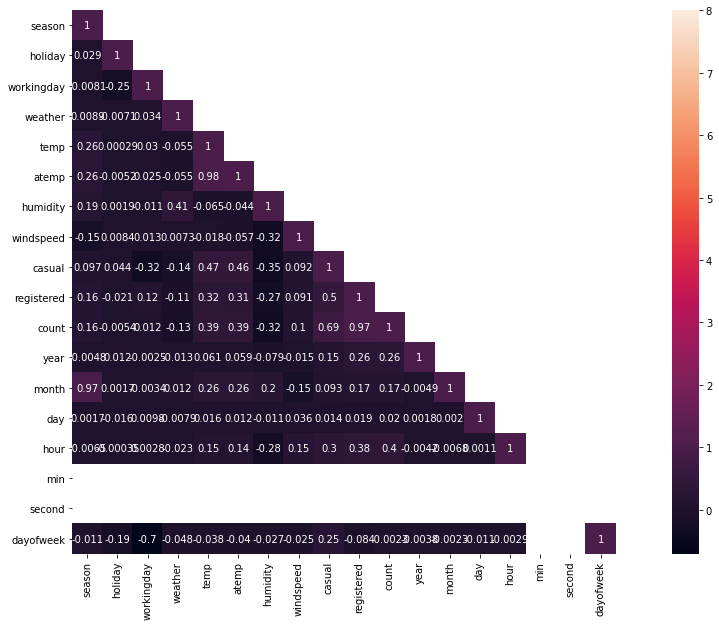

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask = mask, vmax = 8, square = True, annot = True)

- temp, humidity, windspeed는 상관관계가 없다.
- registered, casual는 상관관계가 높다.
- atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피쳐로 사용하기에 적합하지 않을 수 있다.

### regplot으로 산점도 plot을 그림

Text(0.5, 1.0, 'count of humidity')

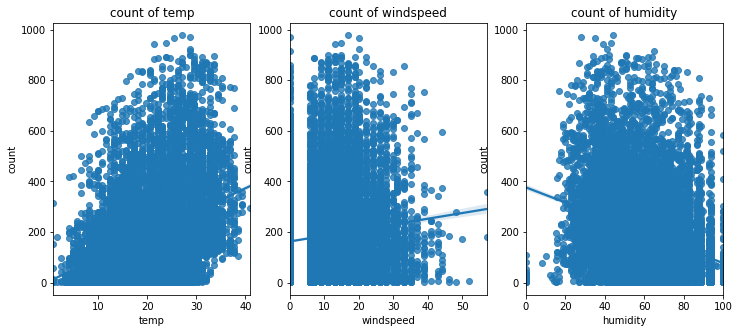

In [70]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(12,5)
sns.regplot(data = df_train_1, x = 'temp', y = 'count', ax = ax1)
sns.regplot(data = df_train_1, x ='windspeed', y = 'count', ax = ax2)
sns.regplot(data = df_train_1, x = 'humidity', y = 'count', ax =ax3)

ax1.set_title('count of temp')
ax2.set_title('count of windspeed')
ax3.set_title('count of humidity')

# temp, windspeed, humidity - > 회귀로 절대로 못맞춤
#(상관계수가 낮음 -> scatter -> drop 하는 것이 좋지 않을까? - > 항상 좋을까? - > 실험적이여야함)

- windspeed의 경우 0에 숫자가 몰려 있는 것으로 보아, 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측한다.

In [71]:
# 월별 데이터 모아보기
def concatenate_year_month(datetime):
  return '{0} - {1}'.format(datetime.year, datetime.month)
df_train_1['year_month'] = df_train_1['datetime'].apply(concatenate_year_month)
print(df_train_1.shape)
df_train_1[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011 - 1
1,2011-01-01 01:00:00,2011 - 1
2,2011-01-01 02:00:00,2011 - 1
3,2011-01-01 03:00:00,2011 - 1
4,2011-01-01 04:00:00,2011 - 1


Text(0.5, 1.0, 'count of year_month')

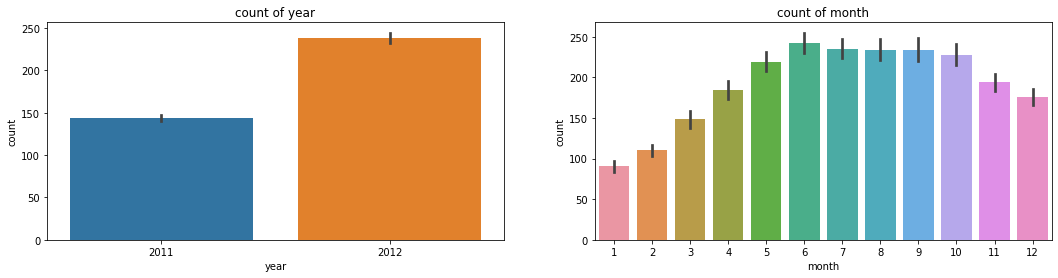

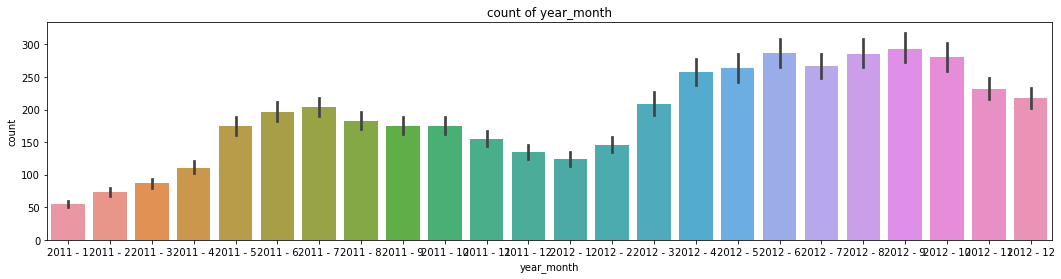

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(18,4)

sns.barplot(data = df_train_1, x = 'year', y = 'count', ax = ax1)
sns.barplot(data = df_train_1, x = 'month', y = 'count', ax = ax2)

ax1.set_title('count of year')
ax2.set_title('count of month')
fig, ax3 = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18,4)

sns.barplot(data = df_train_1, x = 'year_month', y = 'count', ax = ax3)
ax3.set_title('count of year_month')

- 분석 결과: 2011년보다 2012년에 대여량이 더 많다!!! - > 달로 나눠도 증가하고 있습니다.

# 이상치 처리

## 방법1) IQR(Interquartile Range) = Q3(75%) - Q1(25%)

#### Q1-1.5*IQR : 최소 제한선
#### Q3 +1.5*IQR : 최대 제한선

- 범위를 좀 더 조정

In [73]:
# 'count' 데이터에서 전체의 25%에 해당하는 데이터 조회
count_q1 = np.percentile(df_train_1['count'],25)
count_q1

# 'count' 데이터에서 전체의 75%에 해당하는 데이터 조회
count_q3 = np.percentile(df_train_1['count'], 75)
count_q3

# IQR = Q3 - Q1
count_IQR = count_q3 - count_q1
count_IQR

# 이상치를 제외한(이상치가 아닌 구간에 있는) 데이터만 조회
df_train_1_IQR = df_train_1[(df_train_1['count'] >=  (count_q1 - (1.5 * count_IQR))) & (df_train_1['count'] <= (count_q3 + (1.5*count_IQR)))]
print(df_train_1_IQR)
# 약 300개 정도 잃어버림

                 datetime  season  holiday  ...  second  dayofweek  year_month
0     2011-01-01 00:00:00       1        0  ...       0          5    2011 - 1
1     2011-01-01 01:00:00       1        0  ...       0          5    2011 - 1
2     2011-01-01 02:00:00       1        0  ...       0          5    2011 - 1
3     2011-01-01 03:00:00       1        0  ...       0          5    2011 - 1
4     2011-01-01 04:00:00       1        0  ...       0          5    2011 - 1
...                   ...     ...      ...  ...     ...        ...         ...
10881 2012-12-19 19:00:00       4        0  ...       0          2   2012 - 12
10882 2012-12-19 20:00:00       4        0  ...       0          2   2012 - 12
10883 2012-12-19 21:00:00       4        0  ...       0          2   2012 - 12
10884 2012-12-19 22:00:00       4        0  ...       0          2   2012 - 12
10885 2012-12-19 23:00:00       4        0  ...       0          2   2012 - 12

[10586 rows x 20 columns]


## 방법2) 3-sigma, 평균 +- 3 * 표준편차차

In [74]:
df_train_1_sigma = df_train_1[np.abs(df_train_1['count'] - df_train_1['count'].mean()) <= (3*df_train_1['count'].std())]
print(df_train_1_sigma)

# 약 100개 정도 잃어버림

                 datetime  season  holiday  ...  second  dayofweek  year_month
0     2011-01-01 00:00:00       1        0  ...       0          5    2011 - 1
1     2011-01-01 01:00:00       1        0  ...       0          5    2011 - 1
2     2011-01-01 02:00:00       1        0  ...       0          5    2011 - 1
3     2011-01-01 03:00:00       1        0  ...       0          5    2011 - 1
4     2011-01-01 04:00:00       1        0  ...       0          5    2011 - 1
...                   ...     ...      ...  ...     ...        ...         ...
10881 2012-12-19 19:00:00       4        0  ...       0          2   2012 - 12
10882 2012-12-19 20:00:00       4        0  ...       0          2   2012 - 12
10883 2012-12-19 21:00:00       4        0  ...       0          2   2012 - 12
10884 2012-12-19 22:00:00       4        0  ...       0          2   2012 - 12
10885 2012-12-19 23:00:00       4        0  ...       0          2   2012 - 12

[10739 rows x 20 columns]


# IQR을 적용했을 때의 그림

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Working or not Rental amount')]

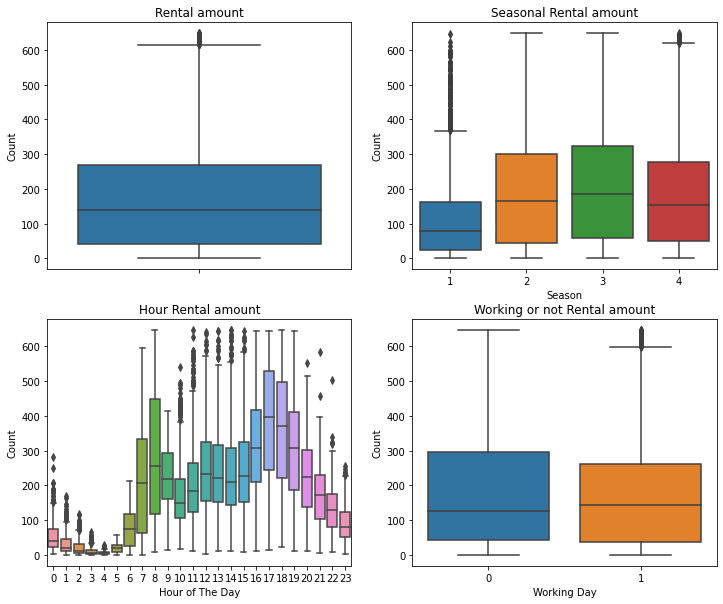

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=df_train_1_IQR, y="count", orient= "v", ax=axes[0][0])
sns.boxplot(data=df_train_1_IQR, y="count", x = "season",orient= "v", ax=axes[0][1])
sns.boxplot(data=df_train_1_IQR, y="count", x="hour",orient= "v", ax=axes[1][0])
sns.boxplot(data=df_train_1_IQR, y="count", x="workingday",orient= "v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Rental amount")
axes[0][1].set(xlabel='Season',ylabel='Count',title="Seasonal Rental amount")
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count',title="Hour Rental amount")
axes[1][1].set(xlabel='Working Day',ylabel='Count',title="Working or not Rental amount")

# 3-sigma를 적용하였을 때

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Working or not Rental amount')]

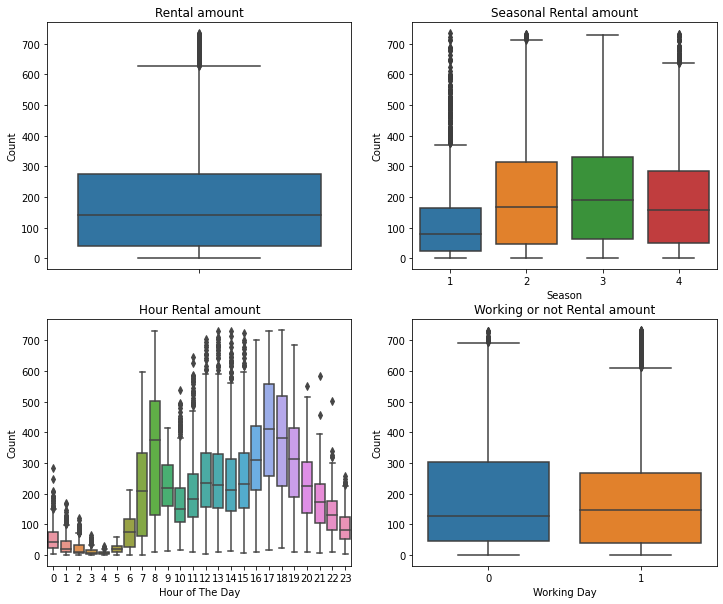

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=df_train_1_sigma, y="count", orient= "v", ax=axes[0][0])
sns.boxplot(data=df_train_1_sigma, y="count", x = "season",orient= "v", ax=axes[0][1])
sns.boxplot(data=df_train_1_sigma, y="count", x="hour",orient= "v", ax=axes[1][0])
sns.boxplot(data=df_train_1_sigma, y="count", x="workingday",orient= "v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Rental amount")
axes[0][1].set(xlabel='Season',ylabel='Count',title="Seasonal Rental amount")
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count',title="Hour Rental amount")
axes[1][1].set(xlabel='Working Day',ylabel='Count',title="Working or not Rental amount")

In [77]:
# datetime - > integer 타입으로 변환하는 custom fun
def to_integer(datetime):
  return 10000*datetime.year + 100 + datetime.month + datetime.day

# 데이터 타입 변경
df_train_1_IQR_int = df_train_1_IQR['datetime'].apply(lambda x : to_integer(x))
df_train_1_IQR['datetime'] = pd.Series(df_train_1_IQR_int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [78]:
df_train_1_IQR

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,second,dayofweek,year_month
0,20110102,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5,2011 - 1
1,20110102,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5,2011 - 1
2,20110102,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5,2011 - 1
3,20110102,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5,2011 - 1
4,20110102,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5,2011 - 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,20120131,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2,2012 - 12
10882,20120131,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2,2012 - 12
10883,20120131,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2,2012 - 12
10884,20120131,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2,2012 - 12


# 모델 적용

In [79]:
 # target과 feature 구분
 # feature = df_train_1_IQR.drop(['count'], axis=1)

 X = df_train_1_IQR.copy()
 X.drop('year_month', axis = 1, inplace = True)
 y = df_train_1_IQR['count'].copy()

 X_test = df_test.copy()

 # 데이터를 편리하게 분할해주는 라이브러리 활용
 from sklearn.model_selection import train_test_split

 # 훈련 데이터의 25% 를 검증 데이터로 활용
 X_train, X_val, y_train,y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [80]:
print(X.shape, y.shape)

(10586, 19) (10586,)


In [81]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1) # 로그 1이 정의가 안됨 방지해주기 위해서
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [83]:
from sklearn.linear_model import LinearRegression

lig_reg = LinearRegression()
lig_reg.fit(X_train,y_train)

score = cross_val_score(lig_reg,X_train,y_train,cv = k_fold,scoring = rmsle_scorer)

score.mean()
print(score.mean())

3.3416328645653775e-14


In [84]:
predict = lig_reg.predict(X_val)

In [85]:
predict

array([246., 447.,  38., ...,  72.,  27.,  63.])

In [86]:
print(np.mean(predict == y_val))

0.011803588290840416
